In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
plt.rcdefaults()

In [3]:
img = cv.imread("Raw_Dataset\img-1.jpg")

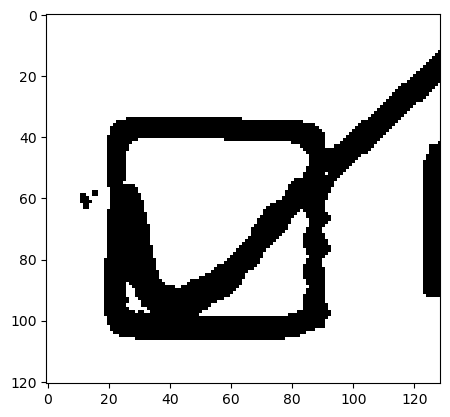

In [4]:
plt.imshow(img)

In [5]:
img.shape

(121, 129, 3)

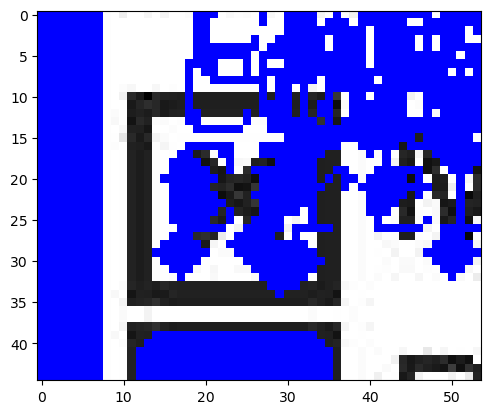

In [6]:
import cv2 as cv
#import image
image = cv.imread("Raw_Dataset\img-3.jpg")

#convert image into greyscale mode
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#find threshold of the image
_, thrash = cv.threshold(gray_image, 240, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thrash, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours:
    shape = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
    x_cor = shape.ravel()[0]
    y_cor = shape.ravel()[1]-15
    
    if len(shape) ==4:
        cv.drawContours(image, [shape], 0, (0,0,255), 4)
        cv.putText(image, "Circle", (x_cor, y_cor), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255))
        
# cv.imshow("Shape", image)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(image)

In [17]:
def get_image_ready(img_path, threshold=240, crop=10):
    img = cv.imread(img_path)
    if crop:
        img = img[crop:img.shape[0]-crop, crop:img.shape[1]-crop]
    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    _, thrash = cv.threshold(gray_image, threshold, 1, cv.THRESH_BINARY)
    return thrash

In [27]:
def get_coordinates_1(a, img, continuity=1, start=0):
    two1 = np.nonzero(img[:, a+start])[0]
    two1shifted = np.concatenate([two1[1:], np.array([0])])
    c1 = two1[(-two1+two1shifted>continuity)][0]
    two1shifted = np.concatenate([ np.array([0]), two1[:-1]])
    c2 = two1[(two1-two1shifted>continuity)][-1]
    return (a, c1), (a, c2)

In [28]:
def get_coordinates_2(a, img, continuity=1, start=0):
    two1 = np.nonzero(img[a+start, :])[0]
    two1shifted = np.concatenate([two1[1:], np.array([0])])
    c1 = two1[(-two1+two1shifted>continuity)][0]
    two1shifted = np.concatenate([ np.array([0]), two1[:-1]])
    c2 = two1[(two1-two1shifted>continuity)][-1]
    return (c1,a), (c2,a)

In [30]:
def get_vert_line(img, difference=10):
    i=2
    lines = []
    while True:
        try:
            diff = (img[:, i].sum())/img.shape[0]*100
        except IndexError:
            break
        if diff<difference:
            lines.append(i)
        i+=2
    return lines

def get_horiz_line(img, difference=10):
    i=2
    lines = []
    while True:
        try:
            diff = (img[i, :].sum())/img.shape[1]*100
        except IndexError:
            break
        if diff<difference:
            lines.append(i)
        i+=2
    return lines

In [38]:
def putting_together(img_path, threshold = 240, continuity = 1, point = None, crop=5):
    img = get_image_ready(img_path, threshold, crop=crop)

    if point is None:
        point = img.shape[0]//2, img.shape[1]//2
    vlines = get_vert_line(img)
    if len(vlines)!=0:
        start = vlines[-1]
    else:
        start = 0
    (x, yt), (x, yb) = get_coordinates_1(point[0], img, continuity)

    hlines = get_horiz_line(img)
    if len(hlines)!=0:
        start = hlines[-1]
    else:
        start = 0
    
    (xl, y), (xr, y) = get_coordinates_2(point[1], img, continuity)
    height = yb-yt
    width = xr-xl
    # if np.abs(height-width)>5:
    #     print("Not a square")
    #     if height<width:
    #         xl = xr-height
    #     else:
    #         xr = xl+width
    fig, axes= plt.subplots(1,2)
    axes[0].imshow(img, cmap='gray')
    axes[0].scatter(xl, yt, c='r', s=30)
    axes[0].scatter(xr, yb, c='r', s=30)
    axes[0].scatter(xl, yt, c='r', s=30)
    axes[0].scatter(xr, yb, c='r', s=30)
    pad = 0
    img_f = img[yt-pad:yb+pad, xl-pad:xr+pad]
    axes[1].imshow(img_f, cmap='gray')
    return img_f


In [57]:
def checked(img, percent=25):
    h,w = img.shape
    all_pixels = h*w
    h_check = h//4
    w_check = w//4
    black_pixels = (img[h_check:h-h_check, w_check:w-w_check]).sum()
    return black_pixels/all_pixels*100<percent

False

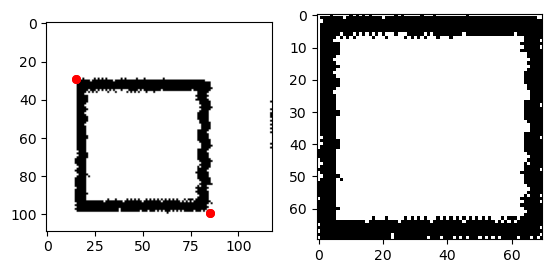

In [59]:
img_f = putting_together("Raw_Dataset\img-7.jpg", threshold=140, continuity=1)
checked(img_f)

In [54]:
h,w = img_f.shape
all_pixels = h*w
h_check = h//4
w_check = w//4
black_pixels = sum(img_f[h_check:h-h_check, w_check:w-w_check])
black_pixels

array([36, 37, 38, 38, 38, 38, 38, 38, 38, 37, 36, 36, 36, 35, 35, 34, 34,
       33, 32, 31, 31, 30, 29, 28, 27, 26, 25, 26, 27, 27, 24, 24, 23, 24,
       24, 24], dtype=uint8)

In [56]:
img_f[h_check:h-h_check, w_check:w-w_check].sum()

1137

True
True
True
True
True
True
False
True
True


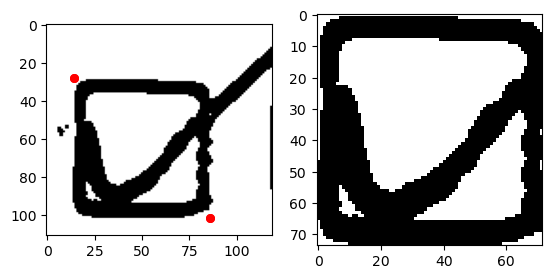

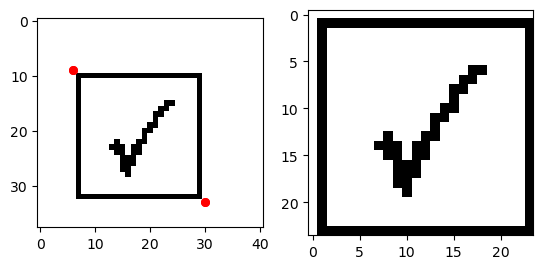

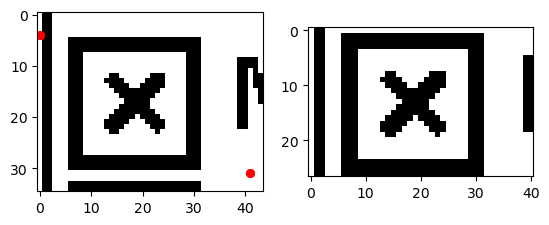

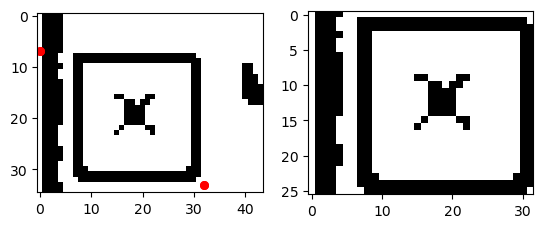

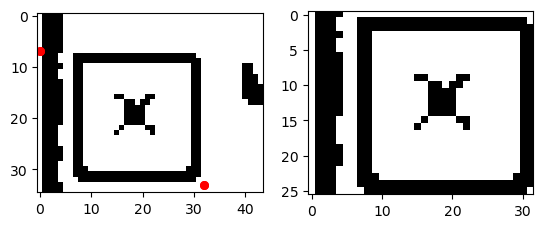

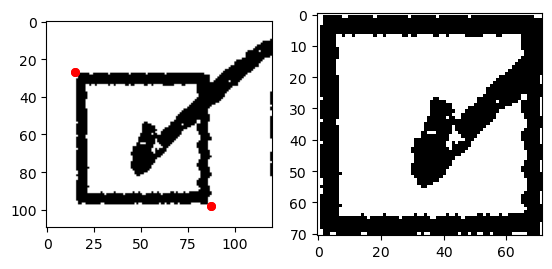

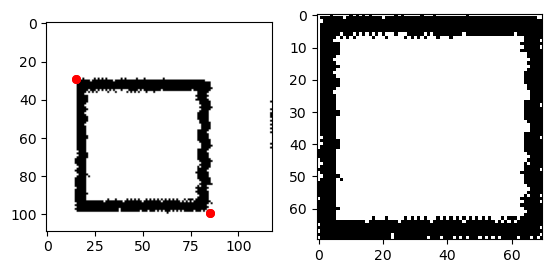

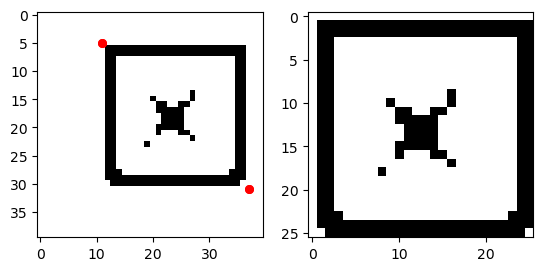

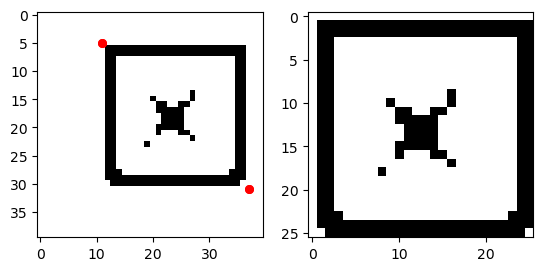

In [61]:
for i in range(1, 10):
    img_path = f"Raw_Dataset\img-{i}.jpg"
    
    img_f = putting_together(f"Raw_Dataset\img-{i}.jpg", threshold=100, continuity=1)
    print(checked(img_f))

In [13]:
get_coordinates_1(30, img4), get_coordinates_2(30, img4)

(((30, 12), (30, 42)), ((5, 30), (37, 30)))

In [81]:
img4[:, 46]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0], dtype=uint8)

In [84]:
i=2
(img4[:, 46].sum()/img4.shape[0])*100

75.55555555555556

In [91]:
def get_vert_line(img, difference=10):
    i=2
    lines = []
    while True:
        try:
            diff = (img[:, i].sum())/img.shape[0]*100
        except IndexError:
            break
        if diff<difference:
            lines.append(i)
        i+=2
    return lines

def get_horiz_line(img, difference=10):
    i=2
    lines = []
    while True:
        try:
            diff = (img[i, :].sum())/img.shape[1]*100
        except IndexError:
            break
        if diff<difference:
            lines.append(i)
        i+=2
    return lines

In [93]:
v, h = get_vert_line(img4, difference=30), get_horiz_line(img4, difference=80)
v, h

([6, 8], [14, 18, 20, 22, 24, 26, 36, 40, 44])

([6, 8], [])